In [196]:
#from scipy.stats import chi2


In [198]:
chi2.sf(4.17,10)

0.9393522453006707

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
from scipy.interpolate import interp1d 
import fitsio
import sys
sys.path.append('../')
sys.path.append('/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_working/')
import scipy
#sys.path.append('../cosmolike_planck_working/')

%load_ext autoreload
%autoreload 2

HF = lambda Nr,Nbin: (Nr-Nbin-2.) *1./(Nr-1.)

In [2]:
from su_utils import read_cov, imshowplot

In [3]:
#../data_txt/mocks//acf_auto_DR12v5_CMASS_South_zcut_jk100.txt

#mean_theta, _, _  = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/CMASS/code/data_txt/acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.txt', unpack=True)
#cov_jk_cmass_1 = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/CMASS/code/data_txt/acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.cov')
cov_jk_cmass_1 = np.genfromtxt('../data_txt/mocks/acf_auto_DR12v5_CMASS_South_veto_jk100.cov')
fisher_jk = HF(100,10) * np.linalg.inv(cov_jk_cmass_1)
cov_jk_cmass = np.linalg.inv(fisher_jk)
print cov_jk_cmass.shape

cov_jk_cmass_zcut_1 = np.genfromtxt('../data_txt/mocks/acf_auto_DR12v5_CMASS_South_zcut_jk100.cov')
fisher_jk_zcut = HF(100,10) * np.linalg.inv(cov_jk_cmass_zcut_1)
cov_jk_cmass_zcut = np.linalg.inv(fisher_jk_zcut)
print cov_jk_cmass_zcut.shape

cov_jk_cmass_2 = np.genfromtxt('../data_txt/mocks//acf_auto_DR12v5_CMASS_South_jk50.cov')
fisher_jk2 = HF(50,10) * np.linalg.inv(cov_jk_cmass_2)
cov_jk_cmass_jk50 = np.linalg.inv(fisher_jk2)
print cov_jk_cmass_jk50.shape


cov_jk_cmass_3 = np.genfromtxt('../data_txt/mocks//acf_auto_DR12v5_CMASS_South_veto_jk200.cov')
fisher_jk3 = HF(200,10) * np.linalg.inv(cov_jk_cmass_3)
cov_jk_cmass_jk200 = np.linalg.inv(fisher_jk3)
print cov_jk_cmass_jk200.shape

cov_jk_cmass_4 = np.genfromtxt('../data_txt/mocks//acf_auto_DR12v5_CMASS_South_jk20.cov')
fisher_jk4 = HF(20,10) * np.linalg.inv(cov_jk_cmass_4)
cov_jk_cmass_jk20 = np.linalg.inv(fisher_jk4)
print cov_jk_cmass_jk200.shape



cov_jkd_cmass = np.genfromtxt('../data_txt/jk_delete_d_12_6//acf_auto_jkd_galaxy_DR12v5_CMASS_South_JK-12-6-924.cov')
#fisher_jkd_cmass = np.linalg.inv(cov_jkd_cmass_1)
#cov_jkd_cmass = np.linalg.inv(fisher_jkd_cmass)



cov_jk_dmass_1 = np.genfromtxt('/n/des/lee.5922/Dropbox/repositories/CMASS/code/output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5/act/acf_auto_dmass_no_weight_pcut01_nbins10_jk100.cov')
fisher_jk_dmass = HF(100,10) * np.linalg.inv(cov_jk_dmass_1)
cov_jk_dmass = np.linalg.inv(fisher_jk_dmass)






(10, 10)
(10, 10)
(10, 10)
(10, 10)
(10, 10)


In [4]:

#cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_10bins_jack'
#cov_an_cmass_jack_G = read_cov( covfilename=cov_an_cmass_filename )[-10:, -10:]

cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_10bins_jack_NG'
cov_an_cmass_jack_only_G = read_cov( covfilename=cov_an_cmass_filename, G=True, NG=False )[-10:, -10:]

cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_10bins_jack_NG'
cov_an_cmass_jack_only_NG = read_cov( covfilename=cov_an_cmass_filename, G=False, NG=True )[-10:, -10:]


cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_dmass_10bins_jack'
cov_an_dmass_jack_only_G = read_cov( covfilename=cov_an_dmass_filename, NG=False )[-10:, -10:]

cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_dmass_10bins_jack_NG'
cov_an_dmass_jack_only_NG = read_cov( covfilename=cov_an_dmass_filename, G=False )[-10:, -10:]


In [5]:

Nthetabin = 10

cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_sgc_veto_10bins_NG_llll_cov_Ntheta10_Ntomo4_1'
#cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_veto_10bins_NG'
cov_an_cmass_only_NG = read_cov( covfilename=cov_an_cmass_filename, G=False )[-10:, -10:]
cov_an_cmass_G = read_cov( covfilename=cov_an_cmass_filename, NG=False )[-10:, -10:]
cov_an_cmass_NG = cov_an_cmass_G + cov_an_cmass_only_NG

#cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_10bins'
#cov_an_cmass = read_cov( covfilename=cov_an_cmass_filename )[-10:, -10:]


cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_veto_10bins_only_shotnoise'
cov_an_cmass_shotnoise = read_cov( covfilename=cov_an_cmass_filename )[-Nthetabin:, -Nthetabin:]

#cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_10bins_veto'
#cov_an_cmass_veto = read_cov( covfilename=cov_an_cmass_filename )[-Nthetabin:, -Nthetabin:]


cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_sgc_veto_20bins_NG_2_llll_cov_Ntheta20_Ntomo4_1'
#cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_veto_10bins_NG'
cov_an_cmass_20bins_only_NG = read_cov( covfilename=cov_an_cmass_filename, G=False )[-20:, -20:]
cov_an_cmass_20ins_G = read_cov( covfilename=cov_an_cmass_filename, NG=False )[-20:, -20:]
cov_an_cmass_20bins_NG = cov_an_cmass_20ins_G + cov_an_cmass_20bins_only_NG


cov_an_cmass_20bins_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_sgc_veto_20bins_NG_shotnoise_llll_cov_Ntheta20_Ntomo4_1'
cov_an_cmass_20bins_shotnoise = read_cov( covfilename=cov_an_cmass_20bins_filename )[-20:, -20:]


cov_an_cmass_ngc_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_ngc_veto_20bins_NG_llll_cov_Ntheta20_Ntomo4_1'
#cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_veto_10bins_NG'
cov_an_cmass_ngc_20bins_only_NG = read_cov( covfilename=cov_an_cmass_ngc_filename, G=False )[-20:, -20:]
cov_an_cmass_ngc_20bins_G = read_cov( covfilename=cov_an_cmass_ngc_filename, NG=False )[-20:, -20:]
cov_an_cmass_ngc_20bins_NG = cov_an_cmass_ngc_20bins_G + cov_an_cmass_ngc_20bins_only_NG


cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_dmass/cov_mcal4_dmass_pcut_sysweight_10bins_NG_llll_cov_Ntheta10_Ntomo4_1'
#cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_dmass_pcut_sysweight_10bins_NG'
cov_an_dmass_G = read_cov( covfilename=cov_an_dmass_filename, NG = False )[-Nthetabin:, -Nthetabin:]
cov_an_dmass_only_NG = read_cov( covfilename=cov_an_dmass_filename, G=False )[-Nthetabin:, -Nthetabin:]
cov_an_dmass_NG = cov_an_dmass_G + cov_an_dmass_only_NG




cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_dmass_10bins_shotnoise_only'
cov_an_dmass_shotnoise = read_cov( covfilename=cov_an_dmass_filename )[-Nthetabin:, -Nthetabin:]



cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_dmass/cov_mcal4_dmass_pcut_sysweight_20bins_NG_2_llll_cov_Ntheta20_Ntomo4_1'
#cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_dmass_pcut_sysweight_10bins_NG'
cov_an_dmass_20bins_G = read_cov( covfilename=cov_an_dmass_filename, NG = False )[-20:, -20:]
cov_an_dmass_20bins_only_NG = read_cov( covfilename=cov_an_dmass_filename, G=False )[-20:, -20:]
cov_an_dmass_20bins_NG = cov_an_dmass_20bins_G + cov_an_dmass_20bins_only_NG



cov_an_dmass_20bins_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_dmass/cov_mcal4_dmass_pcut_sysweight_20bins_NG_shotnoise_llll_cov_Ntheta20_Ntomo4_1'
cov_an_dmass_20bins_shotnoise = read_cov( covfilename=cov_an_dmass_20bins_filename )[-20:, -20:]


In [6]:
#Nthetabin = 10

#cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_cmass_sgc/cov_mcal4_cmass_sgc_veto_10bins_NG_llll_cov_Ntheta10_Ntomo4_1'
#cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_veto_10bins_NG'
#cov_an_cmass_only_NG = read_cov( covfilename=cov_an_cmass_filename, G=False )[-10:, -10:]
#cov_an_cmass_G = read_cov( covfilename=cov_an_cmass_filename, NG=False )[-10:, -10:]
#cov_an_cmass_NG = cov_an_cmass_G + cov_an_cmass_only_NG

#cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_10bins'
#cov_an_cmass = read_cov( covfilename=cov_an_cmass_filename )[-10:, -10:]


#cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_veto_10bins_only_shotnoise'
#cov_an_cmass_shotnoise = read_cov( covfilename=cov_an_cmass_filename )[-Nthetabin:, -Nthetabin:]

#cov_an_cmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_cmass_sgc_10bins_veto'
#cov_an_cmass_veto = read_cov( covfilename=cov_an_cmass_filename )[-Nthetabin:, -Nthetabin:]

In [7]:
#cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_dmass_10bins'
#cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_dmass_10bins'
#cov_an_dmass = read_cov( covfilename=cov_an_dmass_filename )[-Nthetabin:, -Nthetabin:]

#cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/lighthouse_cov/output_dmass/cov_mcal4_dmass_pcut_sysweight_10bins_NG_llll_cov_Ntheta10_Ntomo4_1'
#cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_dmass_pcut_sysweight_10bins_NG'
#cov_an_dmass_G = read_cov( covfilename=cov_an_dmass_filename, NG = False )[-Nthetabin:, -Nthetabin:]
#cov_an_dmass_only_NG = read_cov( covfilename=cov_an_dmass_filename, G=False )[-Nthetabin:, -Nthetabin:]
#cov_an_dmass_NG = cov_an_dmass_G + cov_an_dmass_only_NG

#cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_dmass_10bins_shotnoise_only'
#cov_an_dmass_shotnoise = read_cov( covfilename=cov_an_dmass_filename )[-Nthetabin:, -Nthetabin:]

#cov_an_dmass_filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cosmolike_planck_mg_deltab_gauss/cov/cov_mcal4_dmass_10bins_no_shotnoise'
#cov_an_dmass_no_shotnoise = read_cov( covfilename=cov_an_dmass_filename )[-Nthetabin:, -Nthetabin:]

In [7]:
xi_i = []
for i in range(1,71):
    try:
        
        xi_ii = np.loadtxt('../data_txt/mocks_hybrid//acf_auto_mock_galaxy_DR12_CMASS_S_QPM_{:04}_jk10.jk_corr'.format(i))
        meanr = xi_ii[:,0]
        
        #meanr, xi, _ = np.loadtxt('../data_txt/mocks/acf_auto_poisson_mock_galaxy_DR12_CMASS_S_QPM_{:04}.txt'.format(i), unpack=True)
        #ax.errorbar(meanr, xi, yerr = xi_err, fmt = '-', color='r', alpha = 0.5)
        xi_i.append(xi_ii[:,1:])
    except (IOError, ValueError): pass
    
xi_i = np.hstack(xi_i).T
xi = np.mean(xi_i, axis=0)


Nsample, nthetabins = xi_i.shape

print Nsample

norm =1./Nsample * 9/10.
xi_cov = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        xi_cov[i][j] = norm * np.sum( (xi_i[:, i] - xi[i]) * (xi_i[:,j]-xi[j] ))

Hartlap_mock = 1.0 # HF(Nsample, 10)
xi_cov_corrected_hybrid = np.linalg.inv( Hartlap_mock * np.linalg.inv( xi_cov ) )


#xi_list_mean = xi.copy()
#xi_list_sigma = np.sqrt(xi_cov_corrected_hybrid.diagonal())



700


In [6]:
xi_i = []
for i in range(1,1001):
    try:
        meanr, xi, _ = np.loadtxt('../data_txt/mocks/acf_auto_poisson_mock_galaxy_DR12_CMASS_S_QPM_{:04}.txt'.format(i), unpack=True)
        #ax.errorbar(meanr, xi, yerr = xi_err, fmt = '-', color='r', alpha = 0.5)
        xi_i.append(xi)
    except (IOError, ValueError): pass
    
xi_i = np.array(xi_i)

xi = np.mean(xi_i, axis=0)
#xi_list_sigma = np.std(xi_i, axis=0)


Nsample, nthetabins = xi_i.shape
print Nsample

xi_cov = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        xi_cov[i][j] = 1./ (Nsample-1.) * np.sum( (xi_i[:, i] - xi[i]) * (xi_i[:,j]-xi[j] ))

Hartlap_mock = HF(Nsample, 10)
xi_cov_corrected = np.linalg.inv( Hartlap_mock * np.linalg.inv( xi_cov ) )

#np.savetxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_S_QPM_760.cov', xi_cov_corrected, header = '10bins, Hartlap corrected')
#np.savetxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_S_QPM_760.bin', meanr*60, header= 'theta, arcmin')
#DAT = np.column_stack((meanr, xi))
#np.savetxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_S_QPM_760.wtheta', DAT, header= 'theta(arcmin) wtheta')


760


In [11]:
xi_i = []
for i in range(1,1001):
    try:
        meanr, xi, _ = np.loadtxt('../data_txt/cmass/NGC_ran10/acf_auto_poisson_mock_galaxy_DR12_CMASS_N_QPM_{:04}.rdzw.txt'.format(i), unpack=True)
        #ax.errorbar(meanr, xi, yerr = xi_err, fmt = '-', color='r', alpha = 0.5)
        xi_i.append(xi)
    except (IOError, ValueError): pass
    
xi_i = np.array(xi_i)

xi = np.mean(xi_i, axis=0)
#xi_list_sigma = np.std(xi_i, axis=0)


Nsample, nthetabins = xi_i.shape
print Nsample

xi_cov = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        xi_cov[i][j] = 1./ (Nsample-1.) * np.sum( (xi_i[:, i] - xi[i]) * (xi_i[:,j]-xi[j] ))

Hartlap_mock = HF(Nsample, 10)
xi_cov_corrected_ngc = np.linalg.inv( Hartlap_mock * np.linalg.inv( xi_cov ) )

np.savetxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_N_QPM_1000.cov', xi_cov_corrected_ngc, header = '10bins, Hartlap corrected')
np.savetxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_N_QPM_1000.bin', meanr*60, header= 'theta, arcmin')

DAT = np.column_stack((meanr, xi))
np.savetxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_N_QPM_1000.wtheta', DAT, header= 'theta, xi')




1000


In [15]:
#cp ../data_txt/cmass/bin_slop_05/* ../data_txt/cmass/SGC_binslop05/.

In [6]:
xi_i = []
for i in range(1,1001):
    try:
        meanr, xi, _ = np.loadtxt('../data_txt/cmass/SGC_binslop05//acf_auto_poisson_mock_galaxy_DR12_CMASS_S_QPM_{:04}.rdzw.txt'.format(i), unpack=True)
        #ax.errorbar(meanr, xi, yerr = xi_err, fmt = '-', color='r', alpha = 0.5)
        xi_i.append(xi)
    except (IOError, ValueError): pass
    
xi_i = np.array(xi_i)

xi = np.mean(xi_i, axis=0)
#xi_list_sigma = np.std(xi_i, axis=0)


Nsample, nthetabins = xi_i.shape
print Nsample

xi_cov = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        xi_cov[i][j] = 1./ (Nsample-1.) * np.sum( (xi_i[:, i] - xi[i]) * (xi_i[:,j]-xi[j] ))

Hartlap_mock = HF(Nsample, 10)
xi_cov_corrected_binslop_05 = np.linalg.inv( Hartlap_mock * np.linalg.inv( xi_cov ) )


np.savetxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_S_QPM_550_binslop05.cov', xi_cov_corrected_binslop_05, header = '10bins, Hartlap corrected')
np.savetxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_S_QPM_550_binslop05.bin', meanr*60, header= 'theta, arcmin')

DAT = np.column_stack((meanr, xi))
np.savetxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_S_QPM_550_binslop05.wtheta', DAT, header= 'theta, xi')


555


In [34]:
xi_i = []
for i in range(1,1001):
    try:
        meanr, xi, _ = np.loadtxt('../data_txt/cmass/mocks_halfA/acf_auto_poisson_mock_galaxy_DR12_CMASS_S_QPM_{:04}.rdzw.txt'.format(i), unpack=True)
        #ax.errorbar(meanr, xi, yerr = xi_err, fmt = '-', color='r', alpha = 0.5)
        xi_i.append(xi)
    except (IOError, ValueError): pass
    
xi_i = np.array(xi_i)

xi = np.mean(xi_i, axis=0)
#xi_list_sigma = np.std(xi_i, axis=0)


Nsample, nthetabins = xi_i.shape
print Nsample

xi_cov = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        xi_cov[i][j] = 1./ (Nsample-1.) * np.sum( (xi_i[:, i] - xi[i]) * (xi_i[:,j]-xi[j] ))

Hartlap_mock = HF(Nsample, 10)
xi_cov_corrected_halfA = np.linalg.inv( Hartlap_mock * np.linalg.inv( xi_cov ) )

816


In [53]:
xi_i = []
for i in range(1,1001):
    try:
        #meanr, xi, _ = np.loadtxt('../data_txt/mocks_dense3//acf_auto_poisson_mock_galaxy_DR12_CMASS_S_QPM_{:04}.txt'.format(i), unpack=True)
        #meanr, xi, _ = np.loadtxt('../data_txt/cmass/corrftn_mocks//corrfunc_acf_auto_single_mock_galaxy_DR12_CMASS_S_QPM_{:04}.txt'.format(i), unpack=True)
        meanr, xi, _ = np.loadtxt('../data_txt/cmass/corrftn_mocks_less_ran///corrfunc_acf_auto_single_mock_galaxy_DR12_CMASS_S_QPM_{:04}.txt'.format(i), unpack=True)
        #../data_txt/cmass/corrftn_mocks//
        #ax.errorbar(meanr, xi, yerr = xi_err, fmt = '-', color='r', alpha = 0.5)
        xi_i.append(xi)
    except (IOError, ValueError): pass
    
xi_i = np.array(xi_i)

xi = np.mean(xi_i, axis=0)
#xi_list_sigma = np.std(xi_i, axis=0)


Nsample, nthetabins = xi_i.shape
print Nsample

xi_cov = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        xi_cov[i][j] = 1./ (Nsample-1.) * np.sum( (xi_i[:, i] - xi[i]) * (xi_i[:,j]-xi[j] ))

Hartlap_mock = HF(Nsample, 10)
xi_cov_corrected_corrfunc = np.linalg.inv( Hartlap_mock * np.linalg.inv( xi_cov ) )

1000


In [54]:
xi_i = []
for i in range(1,701):
    try:
        meanr, xi, _ = np.loadtxt('../data_txt/cmass/mocks_mdpatch/acf_auto_poisson_Patchy-Mocks-DR12SGC-COMPSAM_V6C_{:04}.dat.txt'.format(i), unpack=True)
        #ax.errorbar(meanr, xi, yerr = xi_err, fmt = '-', color='r', alpha = 0.5)
        xi_i.append(xi)
    except (IOError, ValueError): pass
    
xi_i = np.array(xi_i)

xi = np.mean(xi_i, axis=0)
#xi_list_sigma = np.std(xi_i, axis=0)


Nsample, nthetabins = xi_i.shape
print Nsample

xi_cov = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        xi_cov[i][j] = 1./ (Nsample-1.) * np.sum( (xi_i[:, i] - xi[i]) * (xi_i[:,j]-xi[j] ))

Hartlap_mock = HF(Nsample, 10)
xi_cov_corrected_mdpatchy = np.linalg.inv( Hartlap_mock * np.linalg.inv( xi_cov ) )

700


In [6]:
xi_i = []
for i in range(1,1001):
    try:
        meanr, xi, _ = np.loadtxt('../data_txt/cmass/SGC_20bins_binslop1//acf_auto_poisson_mock_galaxy_DR12_CMASS_S_QPM_{:04}.rdzw.txt'.format(i), unpack=True)
        #ax.errorbar(meanr, xi, yerr = xi_err, fmt = '-', color='r', alpha = 0.5)
        xi_i.append(xi)
    except (IOError, ValueError): pass
    
xi_i = np.array(xi_i)

xi = np.mean(xi_i, axis=0)
#xi_list_sigma = np.std(xi_i, axis=0)


Nsample, nthetabins = xi_i.shape
print Nsample

xi_cov = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        xi_cov[i][j] = 1./ (Nsample-1.) * np.sum( (xi_i[:, i] - xi[i]) * (xi_i[:,j]-xi[j] ))

Hartlap_mock = 1.0 #HF(Nsample, 10)
xi_cov_corrected_20bins = np.linalg.inv( Hartlap_mock * np.linalg.inv( xi_cov ) )

#np.savetxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_S_QPM_550_20bins_binslop1.cov', xi_cov_corrected_binslop_05, header = '10bins, Hartlap corrected')
#np.savetxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_S_QPM_550_20bins_binslop1.bin', meanr*60, header= 'theta, arcmin')

#DAT = np.column_stack((meanr, xi))
#np.savetxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_S_QPM_550_20bins_binslop1.wtheta', DAT, header= 'theta, xi')



890


In [ ]:
../data_txt/cmass/SGC_20bins_binslop1/acf_auto_poisson_mock_galaxy_DR12_CMASS_S_QPM_0605.rdzw.npairs

In [7]:
#npairs_data = np.genfromtxt('../data_txt/cmass/npairs_DR12v5_CMASS_North_10bins.txt')
#npairs_data = np.genfromtxt('../data_txt/cmass/npairs_DR12v5_CMASS_South_veto_ran5_10bins.txt')
#npairs_data = np.genfromtxt('../data_txt/cmass/npairs_DR12v5_CMASS_South_veto_10bins.txt')
#npairs_data = np.genfromtxt('../data_txt/cmass/npairs_DR12v5_CMASS_South_veto_20bins.txt')
#npairs_data = np.genfromtxt('../data_txt/cmass/npairs_DR12v5_CMASS_South_veto_10bins.txt')
npairs_data = np.genfromtxt('../data_txt/cmass/npairs_cmass_sgc_veto_bins10_binslop_05.txt')

#npairs_data = np.genfromtxt('../data_txt/cmass/npairs_DR12v5_CMASS_South_zcut_10bins.txt')
R_nom = npairs_data[:,0]
R_mean = npairs_data[:,1]
sigma_xi = npairs_data[:,4]

#DDtot, RRtot, DRtot = (31175440221.598083, 2905590542035.3047, 67701180303752.0)
DDtot, RRtot, DRtot = (27648537836.101913, 2566387424018.2686, 59554183743842.0) # veto

DD = npairs_data[:,5]*1.
DR_norm = npairs_data[:,6]*1.
RR_norm = npairs_data[:,7]*1.

f1 = DDtot/DRtot
f2 = DDtot/RRtot
DR = npairs_data[:,6] * DRtot/DDtot
RR = npairs_data[:,7] * RRtot/DDtot
npairs = npairs_data[:,8]

cmass_xi = npairs_data[:,3]

#poisson_var = (1./RR_norm)**2 * ((1./DD + 4*f1/DR_norm + f2/RR_norm) + xi**2 * f2/RR_norm)

In [26]:
#npairs_data = np.genfromtxt('../data_txt/cmass/npairs_DR12v5_CMASS_North_20bins.txt')
#dmass_npairs_data = np.genfromtxt('../data_txt/cmass/npairs_dmass_pcut_sysweight_bins10_binslop_05.txt')
dmass_npairs_data = np.genfromtxt('../data_txt/cmass/npairs_dmass_pcut_no_veto_10bins_binslop_05.txt')
R_nom_dmass = dmass_npairs_data[:,0]
R_mean_dmass = dmass_npairs_data[:,1]
sigma_xi_dmass = dmass_npairs_data[:,4]


dmass_DDtot, dmass_RRtot, dmass_DRtot = 6586580393.219998, 2409173227647.913, 2.20300797011e+14

dmass_DD = dmass_npairs_data[:,5]*1.
dmass_DR_norm = dmass_npairs_data[:,6]*1.
dmass_RR_norm = dmass_npairs_data[:,7]*1.
dmass_npairs = dmass_npairs_data[:,8]*1.

dmass_DR = dmass_npairs_data[:,6]*1. * dmass_DRtot/dmass_DDtot
dmass_RR = dmass_npairs_data[:,7] * dmass_RRtot/dmass_DDtot

dmass_xi = dmass_npairs_data[:,3]

In [27]:
#Area_dmass = 1235.61 #veto
Area_dmass = 1260.9130947509416 #no veto
#Area_cmass = 2560 #2422.648564262496
Area_cmass_veto = 2422.648564262496
#N_dmass = 114774.39081275926 # weight + veto
N_dmass = 117292.90214602613 # no weight no veto
#N_cmass = 249701.58
N_cmass_veto = 235153.31

Area_ratio = Area_cmass_veto/Area_dmass

N_ratio = DD/ dmass_DD
m1, m2 = np.mgrid[0:DD.size, 0:DD.size]
DDratio = np.sqrt(N_ratio)
DDratio_cov = DDratio[m1] * DDratio[m2]

print  np.sqrt(DDtot/dmass_DDtot)
print (Area_cmass_veto/Area_dmass)
print N_cmass_veto/N_dmass
print Area_ratio
print N_ratio

2.0488307611595777
1.92134459888
2.0048383636
1.92134459888
[2.1807415  2.19156845 2.212425   2.20963217 2.22560818 2.24465957
 2.26336361 2.28887672 2.32361026 2.37182504]


In [28]:
# pair counting cov


cov_dmass_DD = np.zeros((theta_cen.size, theta_cen.size))
np.fill_diagonal(cov_dmass_DD, 1/dmass_DD)
cov_DD = np.zeros((theta_cen.size, theta_cen.size))
np.fill_diagonal(cov_DD, 1/DD)


cov_an_cmass_no_shotnoise = cov_an_cmass_G - cov_an_cmass_shotnoise
rescaled_cov = cov_an_cmass_no_shotnoise * Area_ratio \
+ cov_dmass_DD

cov_an_cmass_no_shotnoise_NG = cov_an_cmass_NG - cov_an_cmass_shotnoise
rescaled_cov_NG = cov_an_cmass_no_shotnoise_NG * Area_ratio + cov_dmass_DD

#cov_an_dmass_NG = cov_an_dmass + cov_an_dmass_jack_only_NG
#cov_an_dmass_no_shotnoise_NG = cov_an_dmass_NG - cov_dmass_DD



In [330]:
#cov_ratio = cov_an_dmass.diagonal()/ cov_an_cmass_veto.diagonal()
#shotnoise_ratio = cov_an_dmass_shotnoise.diagonal() * 1./cov_an_cmass_veto_shotnoise.diagonal()
#N_ratio = DD/dmass_DD

2.251231051197445


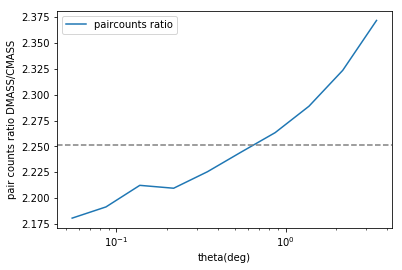

In [29]:
fig, ax = plt.subplots()
#ax.plot( R_mean, cov_ratio, label='cov ratio' )
#ax.plot( R_mean, shotnoise_ratio, label='shotnoise ratio' )
ax.plot( R_mean, N_ratio, label='paircounts ratio' )
ax.axhline( y = np.mean(DD/dmass_DD), color = 'grey', ls = '--' )
#ax.plot( R_mean, npairs/dmass_npairs )

ax.set_xlabel('theta(deg)')
ax.set_ylabel('pair counts ratio DMASS/CMASS')
ax.set_xscale('log')

ax.legend()
print np.mean(DD/dmass_DD)

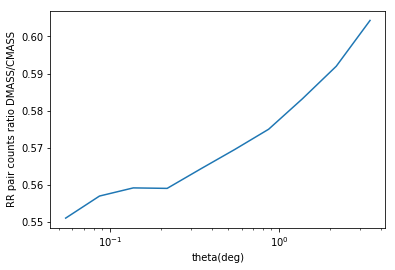

In [30]:
fig, ax = plt.subplots()
ax.plot( R_mean, RR/dmass_RR )
#ax.plot( R_mean, npairs/dmass_npairs )

ax.set_xlabel('theta(deg)')
ax.set_ylabel('RR pair counts ratio DMASS/CMASS')
ax.set_xscale('log')

In [311]:
DAT = np.column_stack((R_mean, DD/dmass_DD))
np.savetxt('../data_txt/cmass/npairs_ratio.txt', DAT, header='R_mean, cmassDD/dmassDD, cmass is vetoed')

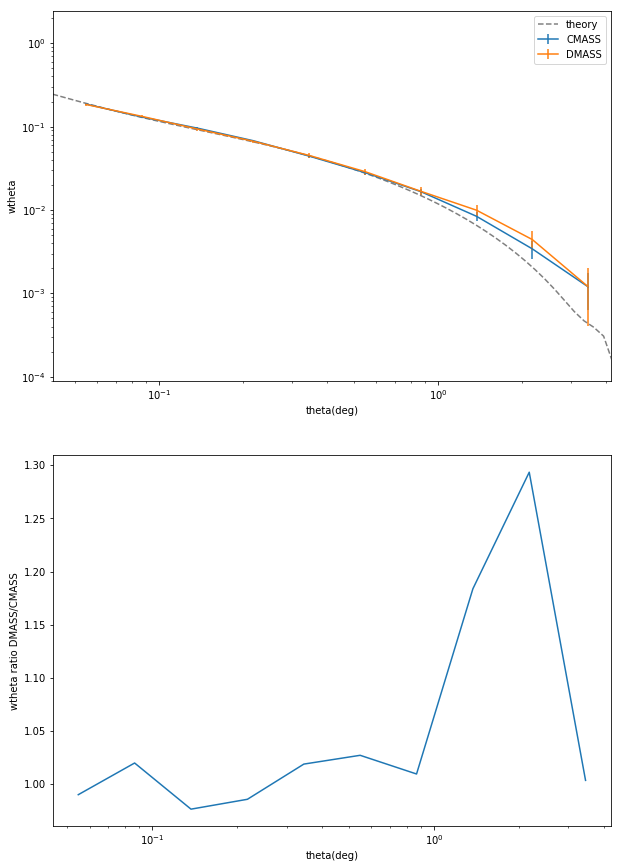

In [16]:
theta = np.logspace(np.log10(2.5), np.log10(250), 11)
theta_cen = 2./3 * ( theta[1:]**3 - theta[:-1]**3 )/( theta[1:]**2 - theta[:-1]**2 )
#meanr_sgc, xi_sgc, xi_err_sgc = np.loadtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.txt',unpack=True)
#cov_cmass_s = np.genfromtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.cov')

theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)


fig, (ax, ax2) = plt.subplots(2,1, figsize = (10,15))
ax.plot( theta_th, theory_sgc, color = 'grey', ls='--', label='theory')
#ax.plot( theta_th, theory_sgc, color = 'grey', ls='--', label='theory')
#ax.plot( R_mean, dmass_xi, label='DMASS')
ax.errorbar( R_mean, cmass_xi, yerr = np.sqrt(cov_an_cmass_NG.diagonal()), label='CMASS')
ax.errorbar( R_mean, dmass_xi, yerr = np.sqrt(cov_an_dmass_NG.diagonal()), label='DMASS')

#ax.errorbar( R_mean, cmass_xi, yerr = np.sqrt(xi_cov_corrected.diagonal()), label='CMASS')

#ax.errorbar( R_mean, cmass_xi, yerr = np.sqrt(cov_jk_cmass_jk50.diagonal()))
#ax.plot( R_mean, npairs/dmass_npairs )
ax.set_xlim(2.5/60., 250/60.)
#ax.set_ylim(0, 0.3)

ax.set_xlabel('theta(deg)')
ax.set_ylabel('wtheta')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

ax2.plot( R_mean, dmass_xi/cmass_xi )
#ax.plot( R_mean, npairs/dmass_npairs )

ax2.set_xlabel('theta(deg)')
ax2.set_ylabel('wtheta ratio DMASS/CMASS')
ax2.set_xscale('log')


0

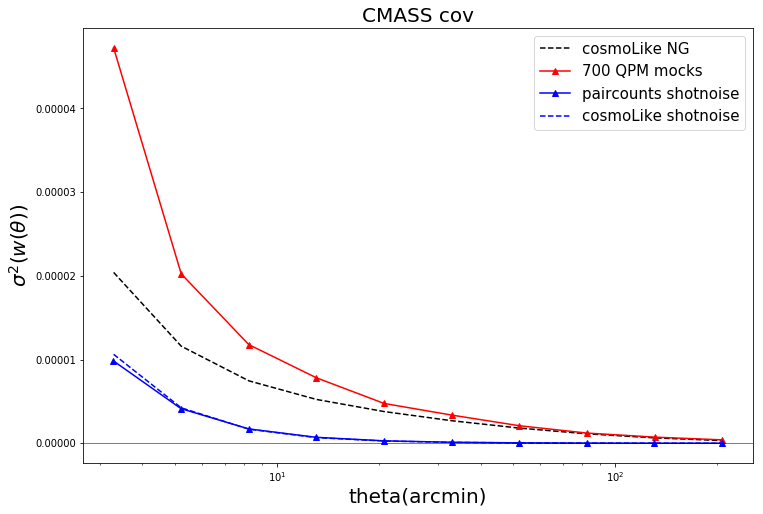

In [18]:

#theta_cen = theta[:-1] * theta[1]/theta[0]/2
#theta2 = np.logspace(np.log10(2.5), np.log10(250), 20)

fig, ax = plt.subplots(figsize = (12,8))

#ax.plot( R_mean*60, cov_jk_cmass.diagonal(), '-', color = 'grey', label = 'jkknife 100')



#ax.plot( theta_cen, cov_an_cmass_G.diagonal(), 'k-', label='analytic G')
ax.plot( theta_cen, cov_an_cmass_NG.diagonal(), 'k--', label='cosmoLike NG')

#ax.plot( theta_cen, cov_an_cmass_jack_only_G.diagonal(), 'y-', label='analytic jack G')
#ax.plot( theta_cen, cov_an_cmass_jack_only_G.diagonal() + cov_an_cmass_jack_only_NG.diagonal(), 'y--', label='analytic jack NG')


#ax.plot( theta_cen, cov_an_dmass_G.diagonal(), '-', color='orange', label='DMASS analytic G')
#ax.plot( theta_cen, cov_an_dmass_NG.diagonal(), '--', color='orange', label='DMASS analytic NG')

#ax.plot( R_mean_dmass*60, 1./dmass_DD, 'b^-', label='paircounts shotnoise DMASS')
#ax.plot( theta_cen, cov_an_dmass_shotnoise.diagonal(), 'b--', label='cosmoLike shotnoise DMASS')

#ax.plot( theta, cov_an_cmass_veto.diagonal(), 'g--', label='cmass-S analytic G veto')
#ax.plot( theta, cov_an_cmass_jack.diagonal(), 'k--', label='analytic NG')




#ax.plot( theta, cov_an_dmass.diagonal(), 'ko-', label='analytic DMASS G')
#ax.plot( theta, cov_an_cmass.diagonal() * DD/dmass_DD, 'ko--', label='analytic rescaled DMASS G')


#ax.plot( theta, cov_jk_cmass_jk50.diagonal(), 'b-', label = 'cmass-S jkknife 50')

#ax.plot( theta, cov_jk_cmass_jk200.diagonal(), 'g-', label = 'cmass-S jkknife 200')
#ax.plot( theta, cov_jk_cmass_zcut.diagonal(), 'b-', label = 'cmass-S zcut jkknife 100')


ax.plot( theta_cen, xi_cov_corrected.diagonal(), 'r^-', label = '700 QPM mocks ')
#ax.plot( theta_cen, xi_cov_corrected_ngc.diagonal(), 'r--', label = '1000 QPM-N mocks ')
#ax.plot( theta_cen, xi_cov_corrected_binslop_05.diagonal(), 'r--', label = 'binslop 05 QPM mocks')
#ax.plot( theta_cen10, cov_jkd_cmass.diagonal(), 'r--', label = 'jkd')
#ax.plot( R_mean*60, xi_cov_corrected_corrfunc.diagonal(), 'r--', label = '60 QPM mocks Corrfunc')
#ax.plot( R_mean*60, xi_cov_corrected_mdpatchy.diagonal(), 'r-.', label = '700 MDP mocks treecorr')
#ax.plot( R_mean*60, xi_cov_corrected_dense.diagonal(), 'r--', label = 'cmass-S 700 QPM mocks, denser randoms')
#ax.plot( R_mean*60, xi_cov_corrected_hybrid.diagonal(), 'b-', label = 'cmass-S QPM 70 mocks+jkknife 10')

#ax.plot( theta, cov_an_dmass.diagonal(), 'b--', label='dmass analytic')
#ax.plot( theta, cov_an_dmass_jack.diagonal(), 'b.-', label='dmass analytic NG')
#ax.plot( theta, cov_jk_dmass.diagonal(), 'b-', label = 'dmass jk')


#ax.plot( R_nom*60, sigma_xi**2, 'k^-', label='shotnoise')
ax.plot( R_mean*60, 1./DD, 'b^-', label='paircounts shotnoise')
ax.plot( theta_cen, cov_an_cmass_shotnoise.diagonal(), 'b--', label='cosmoLike shotnoise')


ax.set_ylabel(r'$\sigma^2 ( w(\theta) )$', fontsize = 20)
ax.set_xlabel('theta(arcmin)', fontsize=20)
ax.legend(fontsize=15)

ax.set_xscale('log')
ax.axhline(y=0, color = 'black', lw=0.5)
#fig.savefig('../figure/cov_analytic_mocks.png')
#ax.set_ylim(0,0.0001)

ax.set_title('CMASS cov', fontsize=20)
0

In [22]:
m1, m2 = np.mgrid[0:DD.size, 0:DD.size]
DDratio = np.sqrt(N_ratio)
DDratio_cov = DDratio[m1] * DDratio[m2]


#rescaled_cov = cov_an_cmass_veto_no_shotnoise * Area_ratio \
#+ cov_an_cmass_veto_shotnoise*DDratio_cov

cov_dmass_DD = np.zeros((theta_cen.size, theta_cen.size))
np.fill_diagonal(cov_dmass_DD, 1/dmass_DD)

cov_DD = np.zeros((theta_cen.size, theta_cen.size))
np.fill_diagonal(cov_DD, 1/DD)
rescaled_cov = cov_an_cmass_no_shotnoise * Area_ratio \
+ cov_dmass_DD

cov_an_cmass_no_shotnoise_NG = cov_an_cmass_NG - cov_an_cmass_shotnoise
rescaled_cov_NG = cov_an_cmass_no_shotnoise_NG * Area_ratio + cov_dmass_DD

#cov_an_dmass_NG = cov_an_dmass_NG + cov_an_dmass_jack_only_NG
#cov_an_dmass_no_shotnoise_NG = cov_an_dmass_NG - cov_an_dmass_shotnoise




/home/lee.5922/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


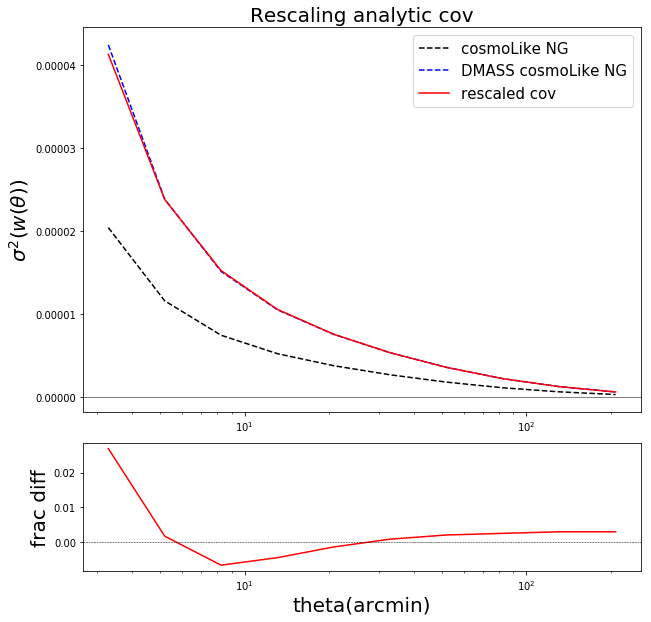

In [23]:
theta = np.logspace(np.log10(2.5), np.log10(250), 11)
theta_cen = 2./3 * ( theta[1:]**3 - theta[:-1]**3 )/( theta[1:]**2 - theta[:-1]**2 )

#fig, (ax, ax2) = plt.subplots(2,1, figsize = (10,12))
fig, (ax, ax2) = plt.subplots(2, 1, figsize = (10, 10), gridspec_kw = {'height_ratios':[3, 1]})
#ax.plot( theta_cen, cov_an_cmass_G.diagonal(), 'k-', label='analytic G')
ax.plot( theta_cen, cov_an_cmass_NG.diagonal(), 'k--', label='cosmoLike NG')

#ax.plot( theta_cen, cov_an_cmass_jack_only_G.diagonal(), 'y-', label='analytic jack G')
#ax.plot( theta_cen, cov_an_cmass_jack_only_G.diagonal() + cov_an_cmass_jack_only_NG.diagonal(), 'y--', label='analytic jack NG')


#ax.plot( theta_cen, cov_an_dmass_G.diagonal(), 'g-', label='DMASS analytic G')
ax.plot( theta_cen, cov_an_dmass_NG.diagonal(), 'b--', label='DMASS cosmoLike NG')

ax.plot( theta_cen, rescaled_cov_NG.diagonal(), 'r-', label='rescaled cov')

ax.set_ylabel(r'$\sigma^2 ( w(\theta) )$', fontsize = 20)
#ax.set_xlabel('theta(arcmin)', fontsize=20)
ax.legend(fontsize=15)

ax.set_xscale('log')
ax.axhline(y=0, color = 'black', lw=0.5)
#fig.savefig('../figure/cov_analytic_mocks.png')
#ax.set_ylim(0,0.0001)

ax.set_title('Rescaling analytic cov', fontsize = 20)
#fig, ax = plt.subplots(figsize = (10,7))

fracdiff_cov = (cov_an_dmass_NG - rescaled_cov_NG)/cov_an_dmass_NG
#ax.plot( theta_cen, cov_an_dmass_NG.diagonal(), 'g--', label='DMASS analytic NG')

ax2.plot( theta_cen, fracdiff_cov.diagonal(), 'r-')

ax2.set_ylabel('frac diff', fontsize = 20)
ax2.set_xlabel('theta(arcmin)', fontsize=20)
ax2.legend(fontsize=15)

ax2.set_xscale('log')
ax2.axhline(y=0, color = 'black', lw=0.5, ls='--')


fig.subplots_adjust(hspace=0.12);

rescale factor 2.3349726374701985


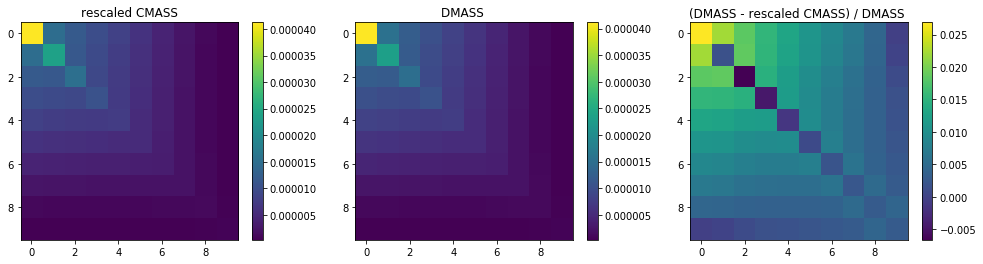

In [189]:
print 'rescale factor', np.mean(DD/ dmass_DD)

fig, (ax, ax2, ax3) = plt.subplots(1,3, figsize = (17,4))
im = ax.imshow(rescaled_cov_NG)
ax.set_title('rescaled CMASS')
fig.colorbar(im, ax=ax)


#fig, ax = plt.subplots()
im2 = ax2.imshow(cov_an_dmass_NG)
ax2.set_title('DMASS ')
fig.colorbar(im2, ax=ax2)


#fig, ax = plt.subplots()
im3 = ax3.imshow(fracdiff_cov)
ax3.set_title('(DMASS - rescaled CMASS) / DMASS ')
fig.colorbar(im3, ax=ax3)

In [31]:
# Rescaling Mocks 

#cov_paircounts = np.zeros((R_mean.size, R_mean.size))
#np.fill_diagonal(cov_paircounts, 1./DD)
mock_no_noise = xi_cov_corrected - cov_DD
rescaled_mocks = mock_no_noise * Area_ratio + cov_dmass_DD

#np.savetxt('../data_txt/cmass/cov_rescaled_mocks_NG.txt', rescaled_mocks, header = ''+str(theta_cen ))
np.savetxt('../data_txt/cmass/cov_dmass_no_veto_rescaled_mocks_NG.txt', rescaled_mocks, header = ''+str(theta_cen ))


0

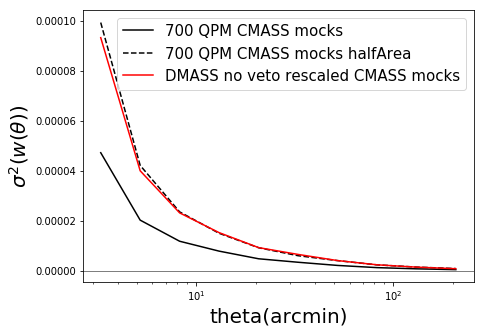

In [37]:
fig, ax2 = plt.subplots(1,1, figsize = (7,5))

ax2.plot( R_mean*60, xi_cov_corrected.diagonal(), 'k-', label = '700 QPM CMASS mocks')
ax2.plot( R_mean*60, xi_cov_corrected_halfA.diagonal(), 'k--', label = '700 QPM CMASS mocks halfArea')
ax2.plot( R_mean*60, rescaled_mocks.diagonal(), 'r-', label = 'DMASS no veto rescaled CMASS mocks')

ax2.set_ylabel(r'$\sigma^2 ( w(\theta) )$', fontsize = 20)
ax2.set_xlabel('theta(arcmin)', fontsize=20)
ax2.legend(fontsize=15)

ax2.set_xscale('log')
ax2.axhline(y=0, color = 'black', lw=0.5)
0

0

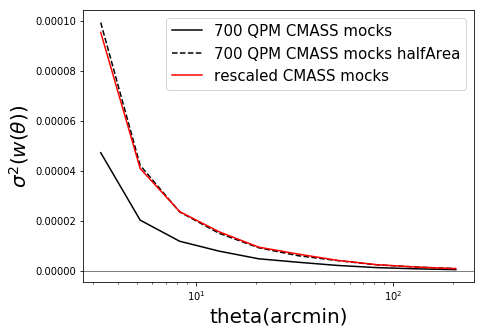

In [190]:
fig, ax2 = plt.subplots(1,1, figsize = (7,5))

ax2.plot( R_mean*60, xi_cov_corrected.diagonal(), 'k-', label = '700 QPM CMASS mocks')
ax2.plot( R_mean*60, xi_cov_corrected_halfA.diagonal(), 'k--', label = '700 QPM CMASS mocks halfArea')
ax2.plot( R_mean*60, rescaled_mocks.diagonal(), 'r-', label = 'rescaled CMASS mocks')

ax2.set_ylabel(r'$\sigma^2 ( w(\theta) )$', fontsize = 20)
ax2.set_xlabel('theta(arcmin)', fontsize=20)
ax2.legend(fontsize=15)

ax2.set_xscale('log')
ax2.axhline(y=0, color = 'black', lw=0.5)
0

cov_NG no shot noise term is wrong


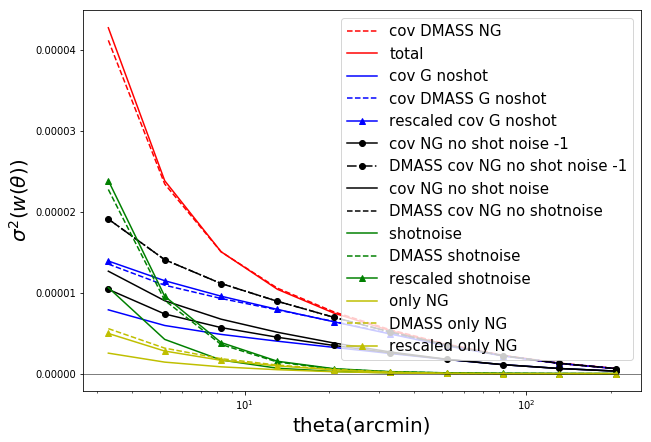

In [421]:
theta10 = np.logspace(np.log10(2.5), np.log10(250), 11)
theta_cen10 = 2./3 * ( theta10[1:]**3 - theta10[:-1]**3 )/( theta10[1:]**2 - theta10[:-1]**2 )

theta = np.logspace(np.log10(2.5), np.log10(250), 11)
theta_cen = 2./3 * ( theta[1:]**3 - theta[:-1]**3 )/( theta[1:]**2 - theta[:-1]**2 )
#theta_cen = theta[:-1] * theta[1]/theta[0]/2
#theta2 = np.logspace(np.log10(2.5), np.log10(250), 20)




fig, ax = plt.subplots(figsize = (10,7))


#ax.plot( theta_cen, cov_an_cmass_veto_NG.diagonal() , 'b-', label='cov NG')
ax.plot( theta_cen, cov_an_dmass_NG.diagonal() , 'r--', label='cov DMASS NG')
total =  (rescaled_cov - cov_dmass_DD) + cov_an_cmass_veto_shotnoise * DDratio_cov + cov_an_cmass_jack_only_NG * Area_ratio
ax.plot( theta_cen, total.diagonal() , 'r-', label='total')

#total_dmass = cov_an_dmass_no_shotnoise_NG + cov_an_dmass_shotnoise
#(cov_an_dmass - cov_dmass_DD) + cov_an_dmass_shotnoise + cov_an_dmass_jack_only_NG
#ax.plot( theta_cen, total_dmass.diagonal() , 'r-.', label='total dmass')

ax.plot( theta_cen, cov_an_cmass_veto_only_G.diagonal() - cov_DD.diagonal() , 'b-', label='cov G noshot')
ax.plot( theta_cen, cov_an_dmass.diagonal() - cov_dmass_DD.diagonal(), 'b--', label='cov DMASS G noshot')
ax.plot( theta_cen, rescaled_cov.diagonal() - cov_dmass_DD.diagonal(), 'b^-', label='rescaled cov G noshot')


ax.plot( theta_cen, cov_an_cmass_veto_only_G.diagonal() - cov_DD.diagonal() \
        + cov_an_cmass_jack_only_NG.diagonal(), 'ko-', label='cov NG no shot noise -1')

ax.plot( theta_cen, cov_an_dmass.diagonal() - cov_dmass_DD.diagonal() \
        + cov_an_dmass_jack_only_NG.diagonal(), 'ko-.', label='DMASS cov NG no shot noise -1')

ax.plot( theta_cen, cov_an_cmass_veto_no_shotnoise_NG.diagonal(), 'k-', label='cov NG no shot noise')
ax.plot( theta_cen, cov_an_dmass_no_shotnoise_NG.diagonal(), 'k--', label='DMASS cov NG no shotnoise')
#ax.plot( theta_cen, cov_an_cmass_veto_no_shotnoise_NG.diagonal() * Area_ratio, 'k^-', label='rescaled cov NG no shot noise')


ax.plot( theta_cen, cov_an_cmass_veto_shotnoise.diagonal(), 'g-', label='shotnoise ')
ax.plot( theta_cen, cov_an_dmass_shotnoise.diagonal(), 'g--', label='DMASS shotnoise')
ax.plot( theta_cen, (cov_an_cmass_veto_shotnoise * DDratio_cov).diagonal(), 'g^-', label='rescaled shotnoise')


ax.plot( theta_cen, cov_an_cmass_jack_only_NG.diagonal(), 'y-', label='only NG ')
ax.plot( theta_cen, cov_an_dmass_jack_only_NG.diagonal(), 'y--', label='DMASS only NG')
ax.plot( theta_cen, (cov_an_cmass_jack_only_NG * Area_ratio).diagonal(), 'y^-', label='rescaled only NG')



#ax.plot( theta_cen, (cov_an_cmass_veto_NG - cov_an_cmass_veto_shotnoise).diagonal(), 'g^-', label='no shotnoise')





ax.set_ylabel(r'$\sigma^2 ( w(\theta) )$', fontsize = 20)
ax.set_xlabel('theta(arcmin)', fontsize=20)
ax.legend(fontsize=15)

ax.set_xscale('log')
ax.axhline(y=0, color = 'black', lw=0.5)
#fig.savefig('../figure/cov_analytic_mocks.png')
#ax.set_ylim(0,0.0001)
0

print 'cov_NG no shot noise term is wrong'

In [83]:
xi_list = []
for i in range(1,1001):
    try:
        meanr, xi, _ = np.loadtxt('../data_txt/mocks_dense3//acf_auto_poisson_mock_galaxy_DR12_CMASS_S_QPM_{:04}.txt'.format(i), unpack=True)
        #ax.errorbar(meanr, xi, yerr = xi_err, fmt = '-', color='r', alpha = 0.5)
        xi_list.append(xi)
    except (IOError, ValueError): pass
    
xi_list = np.array(xi_list)
xi_list_mean = np.mean(xi_list, axis=0)
xi_list_sigma = np.std(xi_list, axis=0)

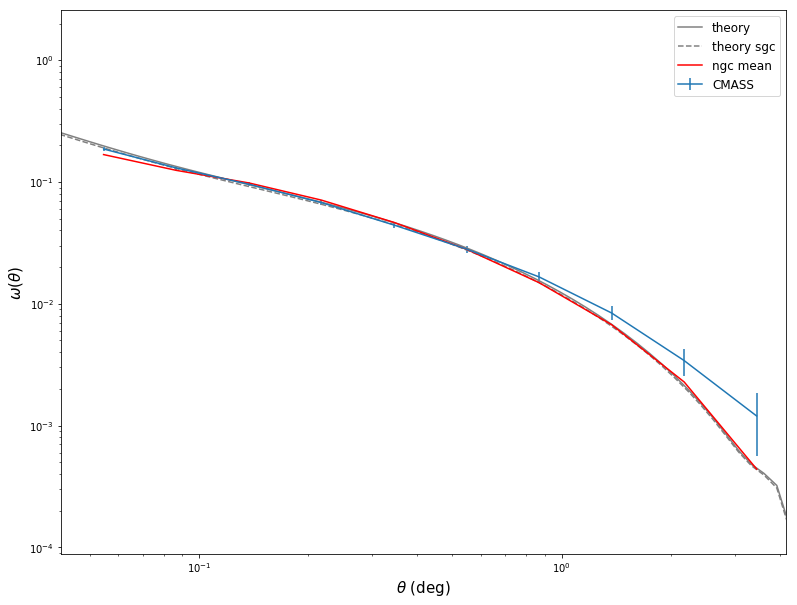

In [151]:
import scipy

rootdir = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5/'

theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)


theta_ngc, xi_mean_ngc = np.genfromtxt('../data_txt/mocks/cov_mock_galaxy_DR12_CMASS_N_QPM_656.ximean', unpack=True)

#_, theory_bias = np.loadtxt('../data_txt/acf_cmass_sgc_theory_bias.txt', unpack=True)
#meanr, xi, xi_err = np.loadtxt(rootdir+'/act//acf_auto_gold_st82_nbins10_jk100.txt', unpack=True)
#meanr, xi, xi_err = np.loadtxt(rootdir+'/act//acf_auto_dmass_weight0_pcut01_nbins10_jk100.txt', unpack=True)
#meanr2, xi2, xi_err2 = np.loadtxt(rootdir+'/act//acf_auto_dmass_veto_pcut01_nbins10_jk100.txt', unpack=True)
#meanr3, xi3, xi_err3 = np.loadtxt('../data_txt/mocks//acf_auto_DR12v5_CMASS_South_zcut_jk100.txt', unpack=True)
#meanr4, xi4, xi_err4 = np.loadtxt('../data_txt/mocks//acf_auto_DR12v5_CMASS_South_veto_jk200.txt', unpack=True)

#
meanr, xi, xi_err = np.loadtxt('../data_txt/mocks//acf_auto_poisson_mock_galaxy_DR12_CMASS_S_QPM_0001.txt', unpack=True)

theory_interp = scipy.interpolate.interp1d(theta_th, theory)
theory_interp = theory_interp(meanr)
theory_sgc_interp = scipy.interpolate.interp1d(theta_th, theory_sgc)
theory_sgc_interp = theory_sgc_interp(meanr)

nzs_ratio = theory_sgc_interp/theory_interp


meanr_sgc, xi_sgc, xi_err_sgc = np.loadtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.txt',unpack=True)
cov_cmass_s = np.genfromtxt('../data_txt//acf_auto_cmass_sgc_sys_cp_nz_weight_nbins10_jk100.cov')




fig, ax = plt.subplots(figsize = (13, 10))


for i in range(1,1001):
    try: pass
        #meanr, xi, xi_err = np.loadtxt('../data_txt/mocks/acf_auto_poisson_mock_galaxy_DR12_CMASS_S_QPM_{:04}.txt'.format(i), unpack=True)
        #ax.errorbar(meanr, xi, yerr = xi_err, fmt = '-', color='r', alpha = 0.05)
    
    except (IOError, ValueError): pass
#ax.errorbar(meanr, xi_list_mean, yerr = xi_list_sigma, fmt = '-', color='r', label='cmass mock')
#ax.errorbar(meanr2, xi2, yerr = xi_err2, fmt = '-', color='b', label='dmass vetoed')
#ax.errorbar(meanr3, xi3, yerr = xi_err3, fmt = '-', color='g', label='cmass sgc veto')
#ax.errorbar(meanr4, xi4, yerr = xi_err4, fmt = '-', color='skyblue', label='cmass sgc veto jk200')
#ax.errorbar(meanr_sgc, xi_sgc, yerr = xi_err_sgc, fmt = 'k-', color='r', label='cmass sgc')

ax.errorbar( R_mean, cmass_xi, yerr = np.sqrt(xi_cov_corrected.diagonal()), label='CMASS')

ax.plot(theta_th, theory, '-', color='grey', label='theory')
ax.plot(theta_th, theory_sgc, '--', color='grey', label='theory sgc')

ax.plot(theta_ngc, xi_mean_ngc, 'r-', label='ngc mean')
#ax.plot(theta_th, theta_th*theory_bias, '--', color='green', label='theory bias')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
#ax.text(1.5, 0.07, r'$\chi^2 $ = {:0.3f}  (south)'.format(chisqr), fontsize = 12)
#ax.set_ylim(1e-4,1)
ax.set_xlim(2.5/60, 250./60)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 15)
ax.set_ylabel(r'$\omega(\theta)$', fontsize = 15)



In [7]:
cmass_sgc_veto_data_20bins = np.genfromtxt('../data_txt/cmass/npairs_DR12v5_CMASS_South_veto_20bins_binslop_05.txt')
_, meanr_sgc_20bins, _, xi_sgc_20bins, _, DD_sgc, RR_sgc, DR_sgc, _ = [cmass_sgc_veto_data_20bins[:,i] for i in range(9)]
#cov_cmass_s_20bins = cov_mocks.copy() #cov_an_cmass.copy()
#xi_err_sgc_20bins = np.sqrt(cov_an_cmass_20bins_NG.diagonal())

#cmass_ngc_data_20bins = np.genfromtxt('../data_txt/cmass/npairs_DR12v5_CMASS_North_20bins_binslop_05.txt')
#_, meanr_ngc_20bins, _, xi_ngc_20bins, _, _, _, _, _ = [cmass_ngc_data_20bins[:,i] for i in range(9)]
#cov_cmass_s_20bins = cov_mocks.copy() #cov_an_cmass.copy()
#xi_err_ngc_20bins = np.sqrt(cov_an_cmass_ngc_20bins_NG.diagonal())


#DD_full = DD_sgc + DD_ngc
#DR_full = DR_sgc + DR_ngc
#RR_full = RR_sgc + RR_ngc

#meanr_full = meanr_ngc.copy()
#xi_full = (DD_full - 2*DR_full + RR_full)*1./RR_full
#cov_cmass_full = np.linalg.inv(np.linalg.inv( cov_cmass_s ) + np.linalg.inv( cov_cmass_s ))
#xi_err_full = np.sqrt(cov_cmass_full.diagonal())

dmass_data_20bins = np.genfromtxt('../data_txt/cmass/npairs_dmass_pcut_sysweight_20bins_binslop_05.txt')
_, meanr_dmass_20bins, _, xi_dmass_20bins, _, _, _, _, _ = [dmass_data_20bins[:,i] for i in range(9)]
#xi_err_dmass_20bins = np.sqrt(cov_an_dmass_20bins_NG.diagonal())



In [8]:
DD_sgc

array([3.9771e+04, 6.1873e+04, 9.5015e+04, 1.4672e+05, 2.2854e+05,
       3.5414e+05, 5.5132e+05, 8.5869e+05, 1.3401e+06, 2.1005e+06,
       3.2895e+06, 5.1285e+06, 8.0121e+06, 1.2547e+07, 1.9586e+07,
       3.0569e+07, 4.7613e+07, 7.4119e+07, 1.1488e+08, 1.7741e+08])

0

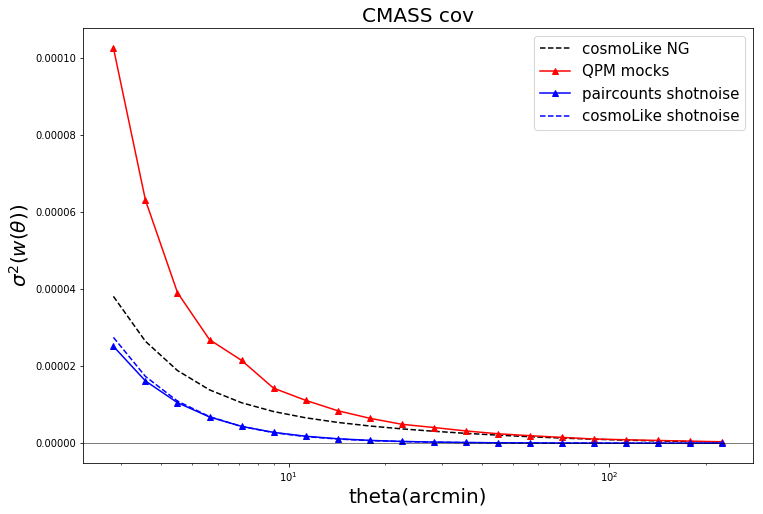

In [9]:
theta_20bins = np.logspace(np.log10(2.5), np.log10(250), 21)
theta_cen_20bins = 2./3 * ( theta_20bins[1:]**3 - theta_20bins[:-1]**3 )/( theta_20bins[1:]**2 - theta_20bins[:-1]**2 )
#theta_cen = theta[:-1] * theta[1]/theta[0]/2
#theta2 = np.logspace(np.log10(2.5), np.log10(250), 20)

fig, ax = plt.subplots(figsize = (12,8))

ax.plot( theta_cen_20bins, cov_an_cmass_20bins_NG.diagonal(), 'k--', label='cosmoLike NG')
ax.plot( theta_cen_20bins, xi_cov_corrected_20bins.diagonal(), 'r^-', label = 'QPM mocks ')
#ax.plot( theta_cen, xi_cov_corrected_ngc.diagonal(), 'r--', label = '1000 QPM-N mocks ')
#ax.plot( theta_cen_20bins, xi_cov_corrected_binslop_05.diagonal(), 'r--', label = 'binslop 05 QPM mocks')


#ax.plot( theta, cov_an_dmass.diagonal(), 'b--', label='dmass analytic')
#ax.plot( theta, cov_an_dmass_jack.diagonal(), 'b.-', label='dmass analytic NG')
#ax.plot( theta, cov_jk_dmass.diagonal(), 'b-', label = 'dmass jk')


#ax.plot( R_nom*60, sigma_xi**2, 'k^-', label='shotnoise')
ax.plot( theta_cen_20bins, 1./DD_sgc, 'b^-', label='paircounts shotnoise')
ax.plot( theta_cen_20bins, cov_an_cmass_20bins_shotnoise.diagonal(), 'b--', label='cosmoLike shotnoise')

ax.set_ylabel(r'$\sigma^2 ( w(\theta) )$', fontsize = 20)
ax.set_xlabel('theta(arcmin)', fontsize=20)
ax.legend(fontsize=15)

ax.set_xscale('log')
ax.axhline(y=0, color = 'black', lw=0.5)
#fig.savefig('../figure/cov_analytic_mocks.png')F
#ax.set_ylim(0,0.0001)

ax.set_title('CMASS cov', fontsize=20)
0